# Security Analytics with AI: UNSW-NB15 Dataset Analysis Assessment


## 0. Introduction

Anomaly detection has many applications, but it has been a popular technology in cybersecurity for detecting patterns or behaviors that are out of the ordinary or never seen, which may pose a threat or an attack. This assignemnt explores anomaly detection using the UNSW-NB15 dataset, one of the most used network intrusion detection systems evaluation datasets. It contains a wide variety of features representing network traffic, including categorical and continuous attributes; hence, it is an ideal dataset to apply advanced machine learning techniques for detecting network anomalies.

Machine learning approaches Particularly decision trees ,offers effective solutions for finding anomalies from high-dimensional data. The main aim is to segregate anomalous network traffic from normal traffic based on the features provided in the dataset. The model learns the features of the dataset and detects anomalies based on the pattern developed by the algorithm. In addition, the project involves the performance evaluation of the model by comparing the predicted values with the actual labels in the dataset and displaying the results using confusion matrices.

This assignment will show how important anomaly detection is in practical applications, such as detecting network intrusions, fraud, and system failures, with a view to gaining insight into the effectiveness of the DecisionTreeClassifier algorithm on complex data that contains both numerical and categorical features.

Objectives : 

- Load and understandiung the dataset structure.
- Perform comprehensive data exploration.
- Build and evaluate a decision tree classifier. 
- conduct advanced analysis and interpretation.

## Task 1: Getting started with Data Loading and Preparation 

### 1.1 Preparing the ground by importing Required Libraries 

#### Installing Anaconda

   - The Anaconda distribution is a software suite to facilitate the AI and Data Science Applications.It includes python 3 and a bunch of usefull libraries

   - Running the command `conda list` from the shell shows the available packages that includes `jupyterlab`,`pandas` , `numpy` , `python` ,`sklearn` and so on.

#### Using Jupyter Notebook in Visual Studio Code

   - Jupyter is simply a notebook approach for programming where we can run snippets cell by cell.

   - Using Jupyter Notebook in Visual Studio (VS) code through the extension `jupyter`, and the environment used is `condas python 3.12.7`.  

   - VS Code is a lightweight and versatile code editor which provides a seamless environment for data analysis and machine learning tools.

#### Import Python Libraries 

   - `import ` command is used to access in-built python libraries in the program

   - `pandas` is a python library provides Dataframe Structure for handling CSV data in which we can handle data from tables.
   
   - `numpy` is used for working with array instead of using lists because it contains in-built functionalities to do efficient calculations when dealing with large datasets. We can `create`,`print` arrays.

   - `math` is the standard in-built python library to do complex mathematical calculations in python.



In [4]:
#importing the required library

#Libraries for data manipulation
import pandas as pd # pandas is imported and ready to use and can be referred to as pd
import numpy as np 
import math

#Libraries for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle 

#Machine learning 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (confusion_matrix, classification_report, 
                           roc_curve, auc, accuracy_score, precision_score, 
                           recall_score, f1_score, ConfusionMatrixDisplay)
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder


# Set the Visualization Style 
plt.style.use('default')
sns.set_palette("husl")


### 1.2 Loading and viewing the datasets

### Load The Dataset 
- `Pandas` and `numpy` packages are imported in the shell.

- `read_csv` method of pandas is used to load the csv file into the dataframe named `df`

In [5]:
try:
    # Loads the testing set data and stores in dataframe object test_data
    testdata = pd.read_csv("UNSW_NB15_testing-set.csv")

    # Loads the training set data and stores in dataframe object train_data
    traindata = pd.read_csv("UNSW_NB15_training-set.csv")

    # Loads the features dataset and stores in dataframe object features_data
    featuresdata = pd.read_csv("NUSW-NB15_features.csv", encoding='windows-1252')

    print("All datasets has been loaded successfully")
    print(f"Train data shape: {traindata.shape}")
    print(f"Test data shape: {testdata.shape}")
    print(f"Features data shape: {featuresdata.shape}")

except FileNotFoundError as e:
    print(f"Error loading files: {e}")
    print("Please ensure all the CSV files are in the same directory")

All datasets has been loaded successfully
Train data shape: (175341, 45)
Test data shape: (82332, 45)
Features data shape: (49, 4)


### 1.3 Understanding the form of the data
- `.info()` which shows the data types of each column and provides an overview of the complete data 
- which shows the `Non-Null Count` and `Dtype` 
- `.head()` returns a specified number of top rows .

In [6]:
# Display basic info about the datasets. After loading the data file into the python,checks the dataset of each coloumns
print("\nTraining Data Info:")
traindata.info()

print("\nTest Data Info:")
testdata.info()

print("\nFeatures Data Info:")
featuresdata.head()

#Checking for the consistency of the datasets
print("\nTraining data columns:{len(train_data.columns)}")
print(f"Test data columns: {len(testdata.columns)}")
print(f"Matching Columns : {list(featuresdata.columns) == list(traindata.columns)}")


Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-

### 1.4 Data Quality Assessment 
- `.isnull().sum()` , which checks cells for missing values and counts missing values per column.
- which shows series with column names and its missing counts.
- `.duplicated().sum()` ,which compares each row with other rows to identify exact duplicates and returns the number of duplicate rows.

In [8]:
print("MISSING VALUES")
print("Training data missing values:")
print(traindata.isnull().sum().sort_values(ascending=False).head(10))

print("\nTest data missing values:")
print(testdata.isnull().sum().sort_values(ascending=False).head(10))

# Check for duplicate rows
print(f"\nDuplicated rows in training data: {traindata.duplicated().sum()}")
print(f"Duplicated rows in test data: {testdata.duplicated().sum()}")

# Check data types
print("\nDATA TYPES")
print("Numerical columns:", traindata.select_dtypes(include=[np.number]).columns.tolist())
print("Categorical columns:", traindata.select_dtypes(include=['object']).columns.tolist())

MISSING VALUES
Training data missing values:
id                   0
dwin                 0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
dtype: int64

Test data missing values:
id                   0
dwin                 0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
dtype: int64

Duplicated rows in training data: 0
Duplicated rows in test data: 0

DATA TYPES
Numerical columns: ['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_spor

## Task 2: Data Understanding and Exploration

### 2.1 Target Variable Analysis Uperation 

#### Analyze the target variable (LABEL)
- `df['label'].value_counts()` which reveals the class imbalance by counting the occurance of each unique values in label column and shows the binary classification distribution .
- from the below code snippet the 53% is normal traffic and 47% is attack data 

TARGET VARIABLE ANALYSIS
Training data label distribution:
label
0     56000
1    119341
Name: count, dtype: int64
Training data normal/attack ratio: 119341/56000

Test data label distribution:
label
0    37000
1    45332
Name: count, dtype: int64
Test data normal/attack ratio: 45332/37000


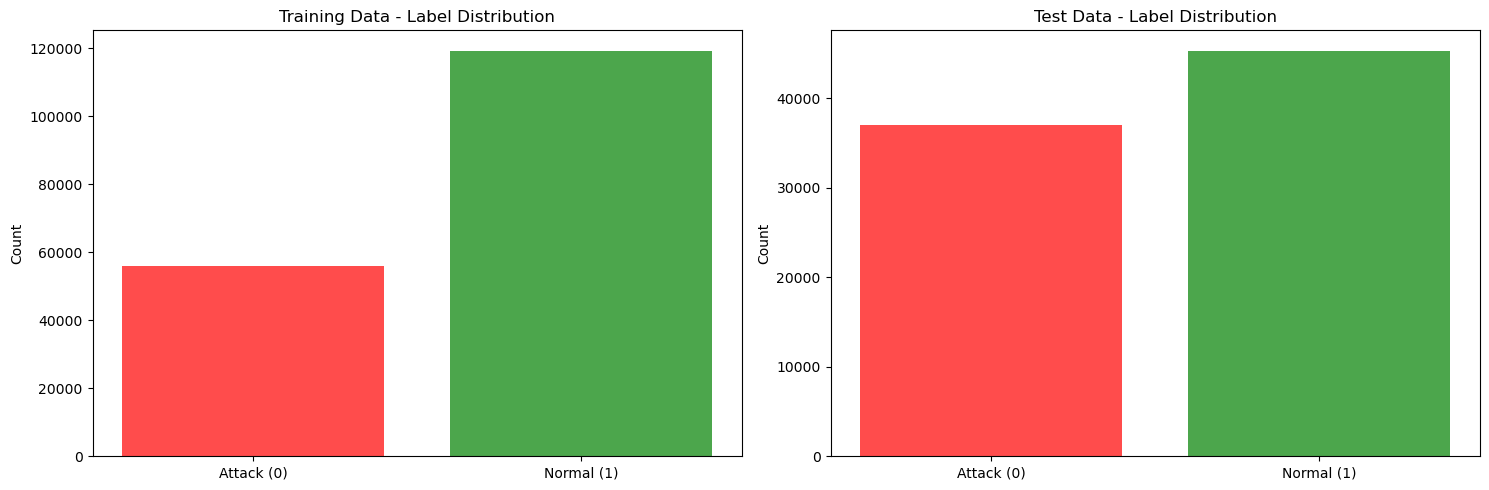

In [9]:
print("TARGET VARIABLE ANALYSIS")
print("Training data label distribution:")
print(traindata['label'].value_counts().sort_index())
print(f"Training data normal/attack ratio: {traindata['label'].value_counts()[1]}/{traindata['label'].value_counts()[0]}")

print("\nTest data label distribution:")
print(testdata['label'].value_counts().sort_index())
print(f"Test data normal/attack ratio: {testdata['label'].value_counts()[1]}/{testdata['label'].value_counts()[0]}")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Training data
train_counts = traindata['label'].value_counts().sort_index()
axes[0].bar(['Attack (0)', 'Normal (1)'], train_counts.values, 
           color=['red', 'green'], alpha=0.7)
axes[0].set_title('Training Data - Label Distribution')
axes[0].set_ylabel('Count')

# Test data
test_counts = testdata['label'].value_counts().sort_index()
axes[1].bar(['Attack (0)', 'Normal (1)'], test_counts.values, 
           color=['red', 'green'], alpha=0.7)
axes[1].set_title('Test Data - Label Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

### 2.2 Attack Categories Analysis

- Which examines how different attack types are distributed and identifies rare vs common attacks 

In [10]:
print("ATTACK CATEGORIES ANALYSIS")
print("Training data attack categories:")
print(traindata['attack_cat'].value_counts())

print("\nTest data attack categories:")
print(testdata['attack_cat'].value_counts())

# Check for inconsistencies in labeling
print("\nLABELING CONSISTENCY CHECK")
# Check if there are any rows labeled as normal (1) but have an attack category
inconsistent_train = traindata[(traindata['label'] == 1) & (traindata['attack_cat'].notna())]
inconsistent_test = testdata[(testdata['label'] == 1) & (testdata['attack_cat'].notna())]

print(f"Inconsistent labels in training data: {len(inconsistent_train)}")
print(f"Inconsistent labels in test data: {len(inconsistent_test)}")

ATTACK CATEGORIES ANALYSIS
Training data attack categories:
attack_cat
Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: count, dtype: int64

Test data attack categories:
attack_cat
Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: count, dtype: int64

LABELING CONSISTENCY CHECK
Inconsistent labels in training data: 119341
Inconsistent labels in test data: 45332


- From the above output there are 9 different attack categories but the generic attack is most common and worms are the rare 
- It will be difficult to learn Rare attacks like (Worms,Shellcode)
- The visualization of attack categories of both test data and train data are done below using `plt.show()`

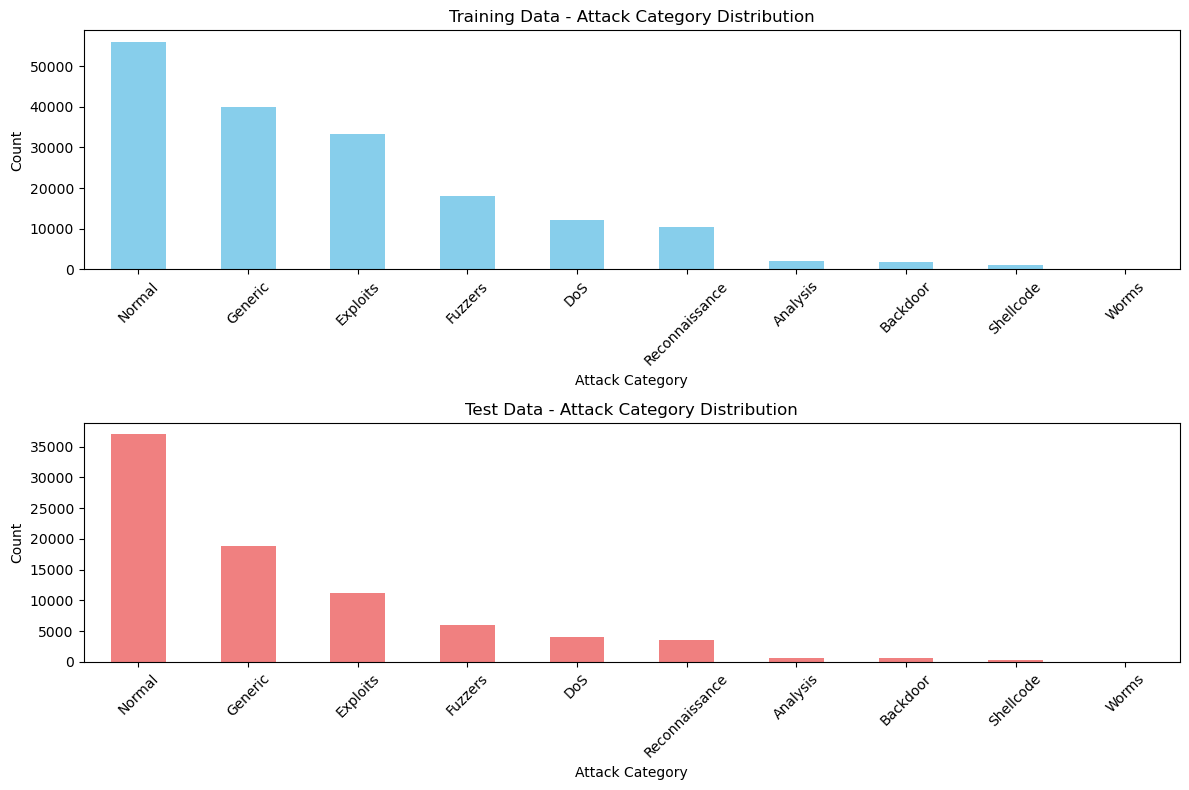

In [13]:
# Visualize attack categories
plt.figure(figsize=(12, 8))
attack_counts = traindata['attack_cat'].value_counts()
plt.subplot(2, 1, 1)
attack_counts.plot(kind='bar', color='skyblue')
plt.title('Training Data - Attack Category Distribution')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
testdata['attack_cat'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Test Data - Attack Category Distribution')
plt.xlabel('Attack Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 2.3 Numerical Feature Analysis and its Statistical Summary 

- `df.select_dtypes(include=[np.number]).columns` function which identifies numerical columns and which seperates numerical from categorical feature and which enables appropriate preprocessing strategies.

- `df.describe()` calculates the statics for numerical columns which helps outlier handling means finding featureds with potential issues .

In [16]:
numerical_cols = traindata.select_dtypes(include=[np.number]).columns
print(f"Number of numerical features: {len(numerical_cols)}")

# Statistical summary
print("NUMERICAL FEATURES STATISTICAL SUMMARY")
print(traindata[numerical_cols].describe())

Number of numerical features: 41
NUMERICAL FEATURES STATISTICAL SUMMARY
                  id            dur          spkts          dpkts  \
count  175341.000000  175341.000000  175341.000000  175341.000000   
mean    87671.000000       1.359389      20.298664      18.969591   
std     50616.731112       6.480249     136.887597     110.258271   
min         1.000000       0.000000       1.000000       0.000000   
25%     43836.000000       0.000008       2.000000       0.000000   
50%     87671.000000       0.001582       2.000000       2.000000   
75%    131506.000000       0.668069      12.000000      10.000000   
max    175341.000000      59.999989    9616.000000   10974.000000   

             sbytes        dbytes          rate           sttl           dttl  \
count  1.753410e+05  1.753410e+05  1.753410e+05  175341.000000  175341.000000   
mean   8.844844e+03  1.492892e+04  9.540619e+04     179.546997      79.609567   
std    1.747656e+05  1.436542e+05  1.654010e+05     102.940011 

In [11]:
# Check for features with extreme values or unusual distributions
print("\nFEATURES WITH POTENTIAL ISSUES")
for col in numerical_cols:
    if col not in ['id', 'label']:  # Skip ID and label columns
        col_data = train_data[col]
        if col_data.std() > 0:  # Only analyze if there's variation
            skewness = col_data.skew()
            if abs(skewness) > 3:  # Highly skewed
                print(f"{col}: High skewness ({skewness:.2f})")
            
            # Check for extreme outliers
            q1, q3 = col_data.quantile(0.25), col_data.quantile(0.75)
            iqr = q3 - q1
            outliers = col_data[(col_data < q1 - 3*iqr) | (col_data > q3 + 3*iqr)]
            if len(outliers) > 0:
                print(f"{col}: {len(outliers)} extreme outliers")


FEATURES WITH POTENTIAL ISSUES
dur: High skewness (7.50)
dur: 9889 extreme outliers
spkts: High skewness (40.22)
spkts: 17937 extreme outliers
dpkts: High skewness (36.76)
dpkts: 16404 extreme outliers
sbytes: High skewness (45.30)
sbytes: 13908 extreme outliers
dbytes: High skewness (39.76)
dbytes: 22341 extreme outliers
rate: High skewness (3.32)
rate: 5589 extreme outliers
sload: High skewness (8.70)
sload: 7404 extreme outliers
dload: High skewness (4.69)
dload: 34314 extreme outliers
sloss: High skewness (44.75)
sloss: 8641 extreme outliers
dloss: High skewness (41.38)
dloss: 18220 extreme outliers
sinpkt: High skewness (7.92)
sinpkt: 9390 extreme outliers
dinpkt: High skewness (29.68)
dinpkt: 5220 extreme outliers
sjit: High skewness (17.65)
sjit: 6907 extreme outliers
djit: High skewness (29.54)
djit: 15985 extreme outliers
tcprtt: High skewness (4.04)
tcprtt: 2395 extreme outliers
synack: High skewness (5.79)
synack: 12516 extreme outliers
ackdat: High skewness (5.62)
ackdat: 

### 2.4 Feature Distribution Visualization 

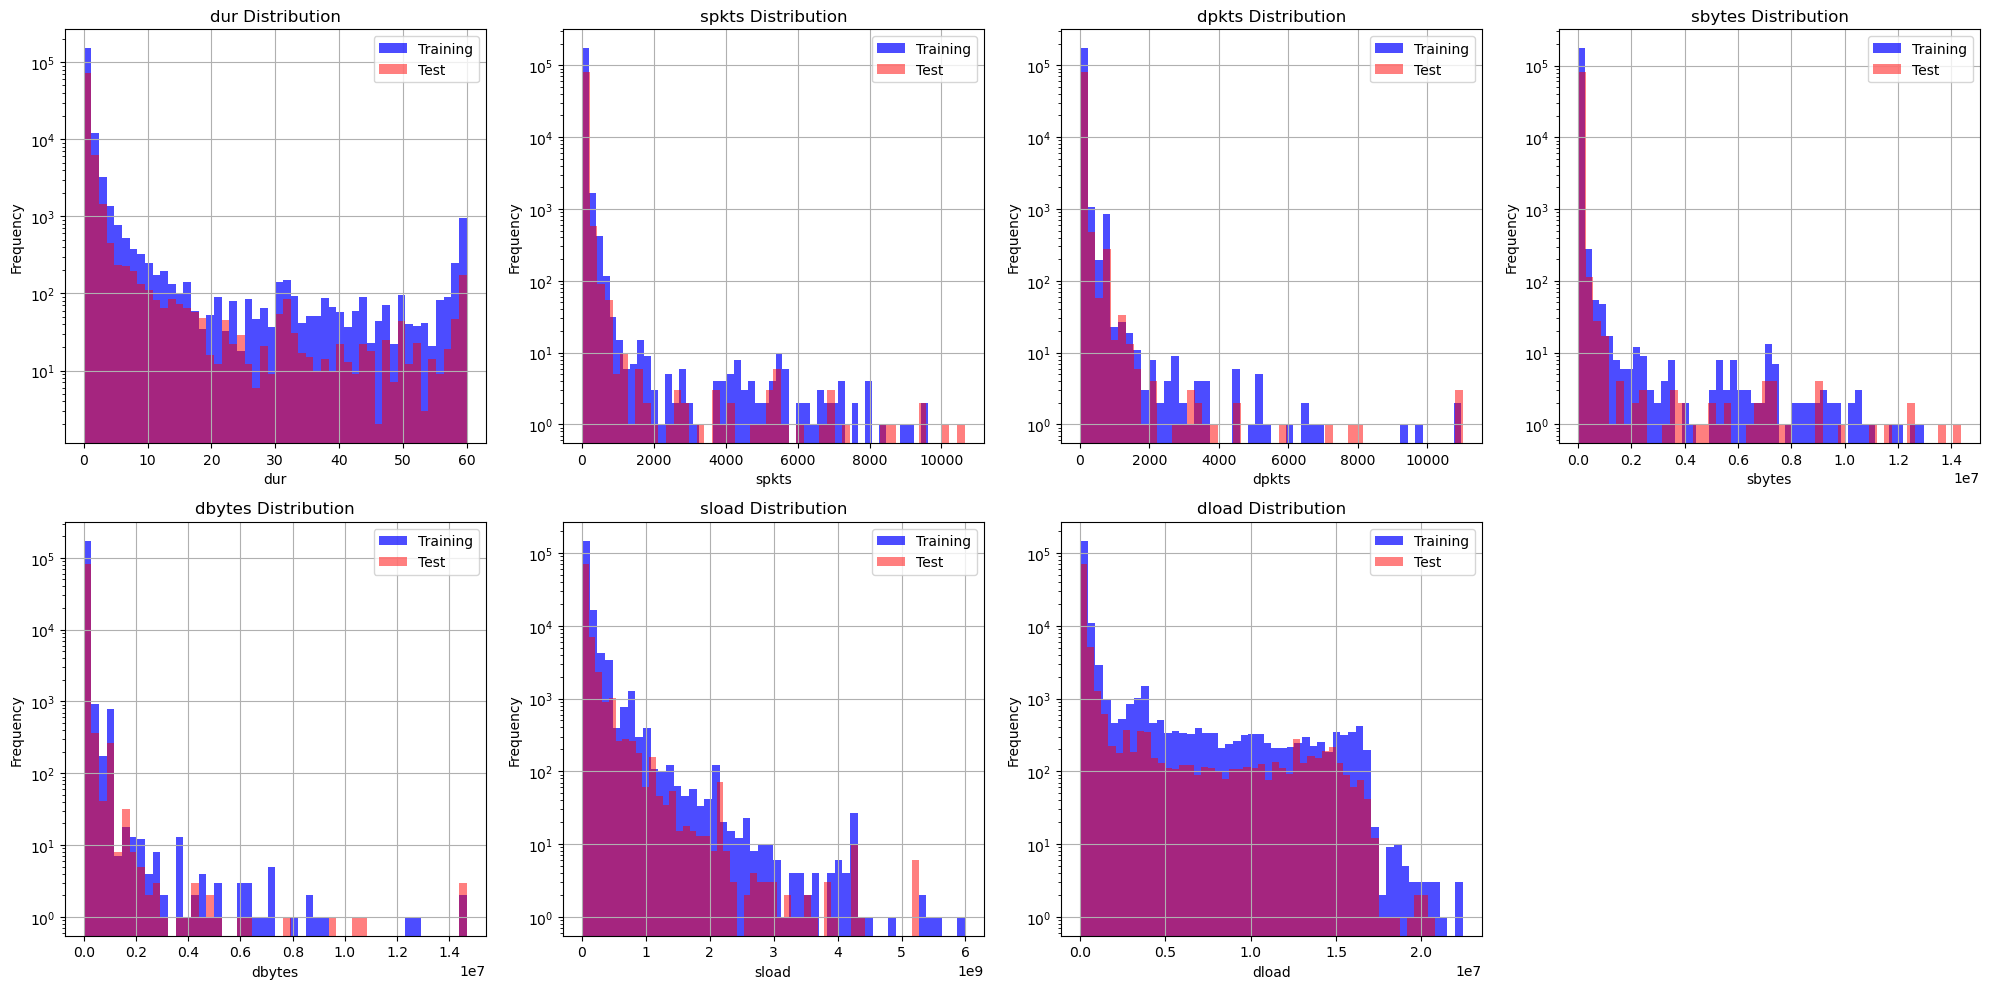

In [17]:
# Visualize distributions of key features
key_features = ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'sload', 'dload']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    if feature in traindata.columns:
        # Plot distribution with log scale due to heavy skewness
        traindata[feature].hist(bins=50, alpha=0.7, ax=axes[i], 
                               color='blue', label='Training')
        testdata[feature].hist(bins=50, alpha=0.5, ax=axes[i], 
                              color='red', label='Test')
        axes[i].set_title(f'{feature} Distribution')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].set_yscale('log')  # Log scale for better visualization

# Remove empty subplot
if len(key_features) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### 2.5 Categorical Features 

In [13]:
# Analyze categorical features
categorical_cols = train_data.select_dtypes(include=['object']).columns
print(f"Categorical features: {categorical_cols.tolist()}")

# Analyze each categorical feature
for col in categorical_cols:
    if col not in ['id']:  # Skip ID column
        print(f"\n=== {col.upper()} ANALYSIS ===")
        print("Training data unique values:", train_data[col].nunique())
        print("Test data unique values:", test_data[col].nunique())
        
        # Show value counts
        print(f"Training data {col} distribution:")
        print(train_data[col].value_counts().head(10))
        
        # Check if categories are consistent between train and test
        train_categories = set(train_data[col].unique())
        test_categories = set(test_data[col].unique())
        
        only_in_train = train_categories - test_categories
        only_in_test = test_categories - train_categories
        
        if only_in_train:
            print(f"Categories only in training: {only_in_train}")
        if only_in_test:
            print(f"Categories only in test: {only_in_test}")

Categorical features: ['proto', 'service', 'state', 'attack_cat']

=== PROTO ANALYSIS ===
Training data unique values: 133
Test data unique values: 131
Training data proto distribution:
proto
tcp       79946
udp       63283
unas      12084
arp        2859
ospf       2595
sctp       1150
any         300
gre         225
sun-nd      201
ipv6        201
Name: count, dtype: int64
Categories only in training: {'icmp', 'rtp'}

=== SERVICE ANALYSIS ===
Training data unique values: 13
Test data unique values: 13
Training data service distribution:
service
-           94168
dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
Name: count, dtype: int64

=== STATE ANALYSIS ===
Training data unique values: 9
Test data unique values: 7
Training data state distribution:
state
INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
PAR        1
URN        1
no         1
Na

## Task 3 : Decision Tree Classifier Implementation 

### 3.1 Data Preprocessing Operation 

- `le =LabelEncoder()
  df['service] = le.fit_transform(df['service])`


In [ ]:
# Prepare data for machine learning
def preprocess_data(train_df, test_df):
    """
    Preprocess training and test data for machine learning
    """
    # Make copies to avoid modifying original data
    train_processed = train_df.copy()
    test_processed = test_df.copy()
    
    # Remove irrelevant columns
    columns_to_drop = ['id']  # ID is not meaningful for classification
    if 'attack_cat' in train_processed.columns:
        columns_to_drop.append('attack_cat')  # Remove attack category as it's not a feature
    
    train_processed = train_processed.drop(columns=columns_to_drop, errors='ignore')
    test_processed = test_processed.drop(columns=columns_to_drop, errors='ignore')
    
    # Handle missing values
    print("Handling missing values...")
    # For numerical columns, fill with median
    numerical_cols = train_processed.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if col != 'label':  # Don't fill label column
            median_val = train_processed[col].median()
            train_processed[col].fillna(median_val, inplace=True)
            test_processed[col].fillna(median_val, inplace=True)
    
    # For categorical columns, fill with mode
    categorical_cols = train_processed.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        mode_val = train_processed[col].mode()[0] if not train_processed[col].mode().empty else 'unknown'
        train_processed[col].fillna(mode_val, inplace=True)
        test_processed[col].fillna(mode_val, inplace=True)
    
    # Encode categorical variables
    print("Encoding categorical variables...")
    label_encoders = {}
    
    for col in categorical_cols:
        le = LabelEncoder()
        # Fit on combined data to ensure consistency
        combined_data = pd.concat([train_processed[col], test_processed[col]])
        le.fit(combined_data)
        
        train_processed[col] = le.transform(train_processed[col])
        test_processed[col] = le.transform(test_processed[col])
        
        label_encoders[col] = le
    
    return train_processed, test_processed, label_encoders

# Preprocess the data
train_processed, test_processed, encoders = preprocess_data(traindata, testdata)

# Separate features and target
X_train = train_processed.drop('label', axis=1)
y_train = train_processed['label']
X_test = test_processed.drop('label', axis=1)
y_test = test_processed['label']

print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Feature names.: {X_train.columns.tolist()}")

Handling missing values...
Encoding categorical variables...


C:\Users\Vishnu Ravi\AppData\Local\Temp\ipykernel_21604\2103721293.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_processed[col].fillna(median_val, inplace=True)
C:\Users\Vishnu Ravi\AppData\Local\Temp\ipykernel_21604\2103721293.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

Training features shape: (175341, 42)
Test features shape: (82332, 42)
Feature names: ['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']


### 3.2 Train Desision Tree Classifier 

- `dt_classifier = DecisionTreeClassifier(
    random_state=42,  # For reproducibility
    criterion='gini'  # Default criterion
)`
- `dt_classifier.fit(X_train, y_train)`
- Learns decision rules from training data 
- which creates tree structure with a split conditions 
- which uses the gini impurity to choose the best splits 

-Tree Building Process:

- Root node: Contains all the training data
- Split selection: Find features and threshold that best separates the classes
- Recursive splitting: Repeats for each child node
- Stopping criteria: When node are pure or meet minimum requirement.

In [20]:
# Train decision tree classifier
print("Training Decision Tree Classifier...")

# Use default parameters as specified in the assignment
dt_classifier = DecisionTreeClassifier(
    random_state=42,  # For reproducibility
    criterion='gini'  # Default criterion
)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

print("Decision Tree training completed")
print(f"Tree depth: {dt_classifier.get_depth()}")
print(f"Number of leaves: {dt_classifier.get_n_leaves()}")

Training Decision Tree Classifier...
Decision Tree training completed
Tree depth: 42
Number of leaves: 5665


### 3.3 Feature Importance Analysis 
- which calculates how each features contributes to tree decisions based on weighted impurity decrease.
- and , Visualize the importance of the feature 

=== TOP 15 MOST IMPORTANT FEATURES ===
           feature  importance
9             sttl    0.675430
40      ct_srv_dst    0.061747
6           sbytes    0.047394
26           smean    0.029260
30      ct_srv_src    0.014380
24          synack    0.010430
15          sinpkt    0.009920
23          tcprtt    0.009834
35  ct_dst_src_ltm    0.009749
20           stcpb    0.009606
11           sload    0.009533
12           dload    0.009376
21           dtcpb    0.009342
25          ackdat    0.008396
18            djit    0.007951


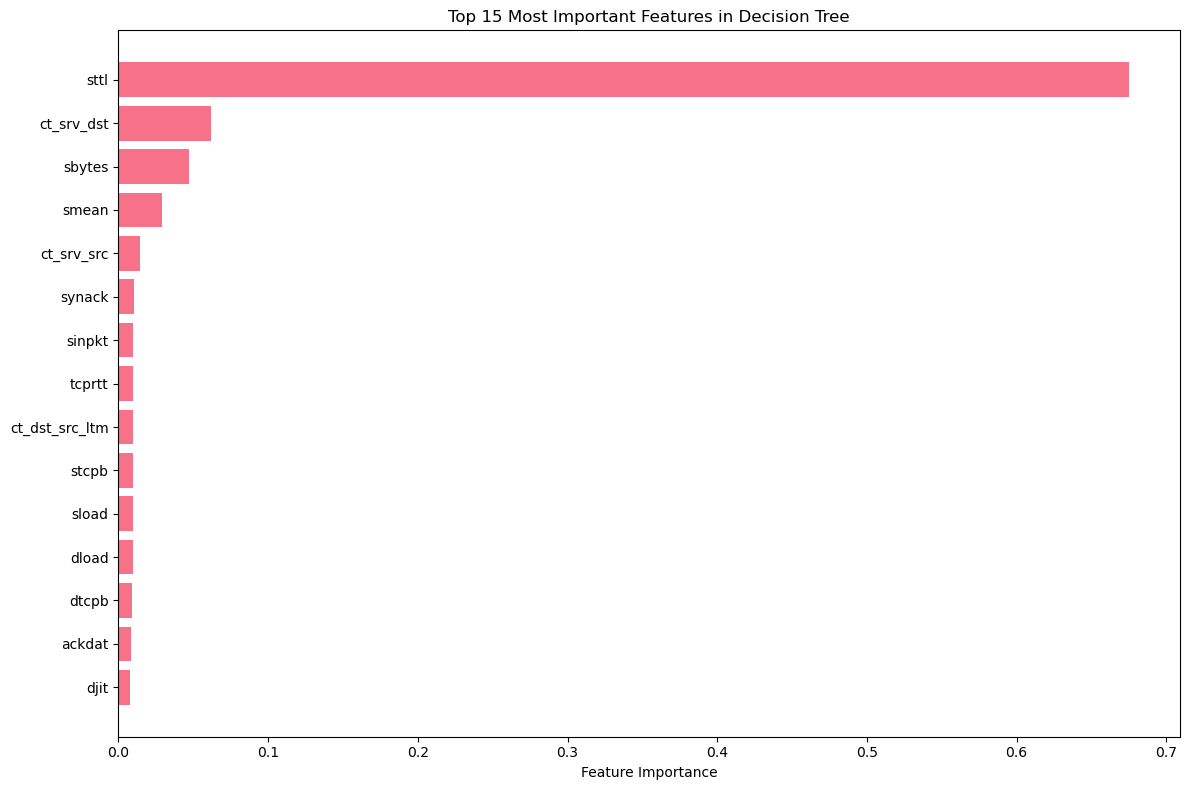

In [ ]:
# Analyze feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("The TOP 15 MOST IMPORTANT FEATURES")
print(feature_importance.head(15))

# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features in the Decision Tree')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 3.4 Model Evaluation Operations 
- `cm = confusion_matrix(y_true, y_pred)`
- which compares actual vs predicted labels in normal and attack and creates a 2*2 matrix Binary classifications 
- And, shows all the possible predicted outcomes. 
- Evaluation on both test Data and train and plots its confusion matrix 


Training Set EVALUATION
Accuracy: 0.9982
Precision: 0.9989
Recall: 0.9984
F1-Score: 0.9987

Classification Report:
              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00     56000
      Normal       1.00      1.00      1.00    119341

    accuracy                           1.00    175341
   macro avg       1.00      1.00      1.00    175341
weighted avg       1.00      1.00      1.00    175341



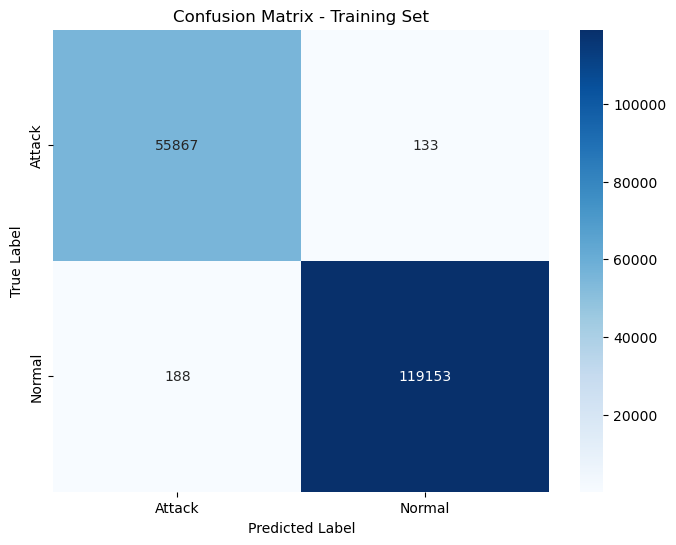


Test Set EVALUATION
Accuracy: 0.8648
Precision: 0.8252
Recall: 0.9572
F1-Score: 0.8863

Classification Report:
              precision    recall  f1-score   support

      Attack       0.93      0.75      0.83     37000
      Normal       0.83      0.96      0.89     45332

    accuracy                           0.86     82332
   macro avg       0.88      0.85      0.86     82332
weighted avg       0.87      0.86      0.86     82332



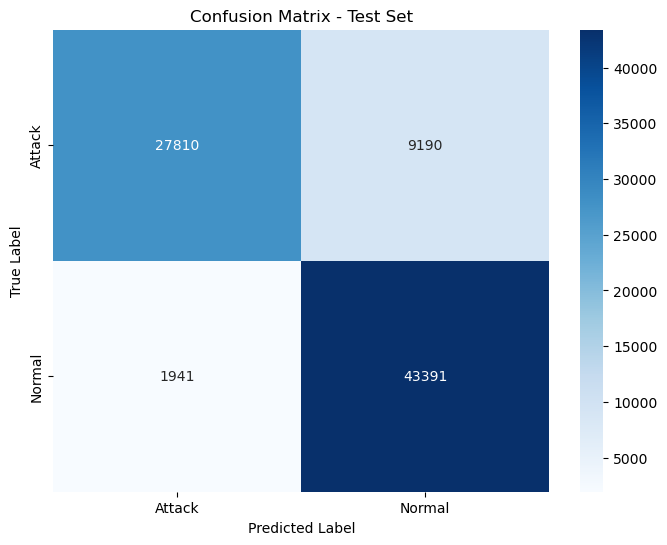

In [26]:
# Comprehensive evaluation
def evaluate_model(y_true, y_pred, dataset_name):
   
    print(f"\n{dataset_name} EVALUATION")
    
    # Basic metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    
    # Detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Attack', 'Normal']))
    
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Attack', 'Normal'], 
                yticklabels=['Attack', 'Normal'])
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    return accuracy, precision, recall, f1

# Evaluate on both training and test sets
train_metrics = evaluate_model(y_train, y_train_pred, "Training Set")
test_metrics = evaluate_model(y_test, y_test_pred, "Test Set")

## Task 4 : Further Investigation 

### 4.1 Performance by Attack Type 
- Which segments result by specific attack categories 
- metrics for each attack type calulated seperately.
- And, Identifies which attacks are harder to detect 

=== PERFORMANCE BY ATTACK TYPE ===
      attack_type  count  accuracy  precision    recall
0          Normal  37000  0.751622        0.0  0.000000
9         Generic  18871  0.993270        1.0  0.993270
4        Exploits  11132  0.976285        1.0  0.976285
6         Fuzzers   6062  0.769713        1.0  0.769713
3             DoS   4089  0.985082        1.0  0.985082
1  Reconnaissance   3496  0.990561        1.0  0.990561
5        Analysis    677  0.948301        1.0  0.948301
2        Backdoor    583  0.993139        1.0  0.993139
8       Shellcode    378  0.947090        1.0  0.947090
7           Worms     44  0.977273        1.0  0.977273


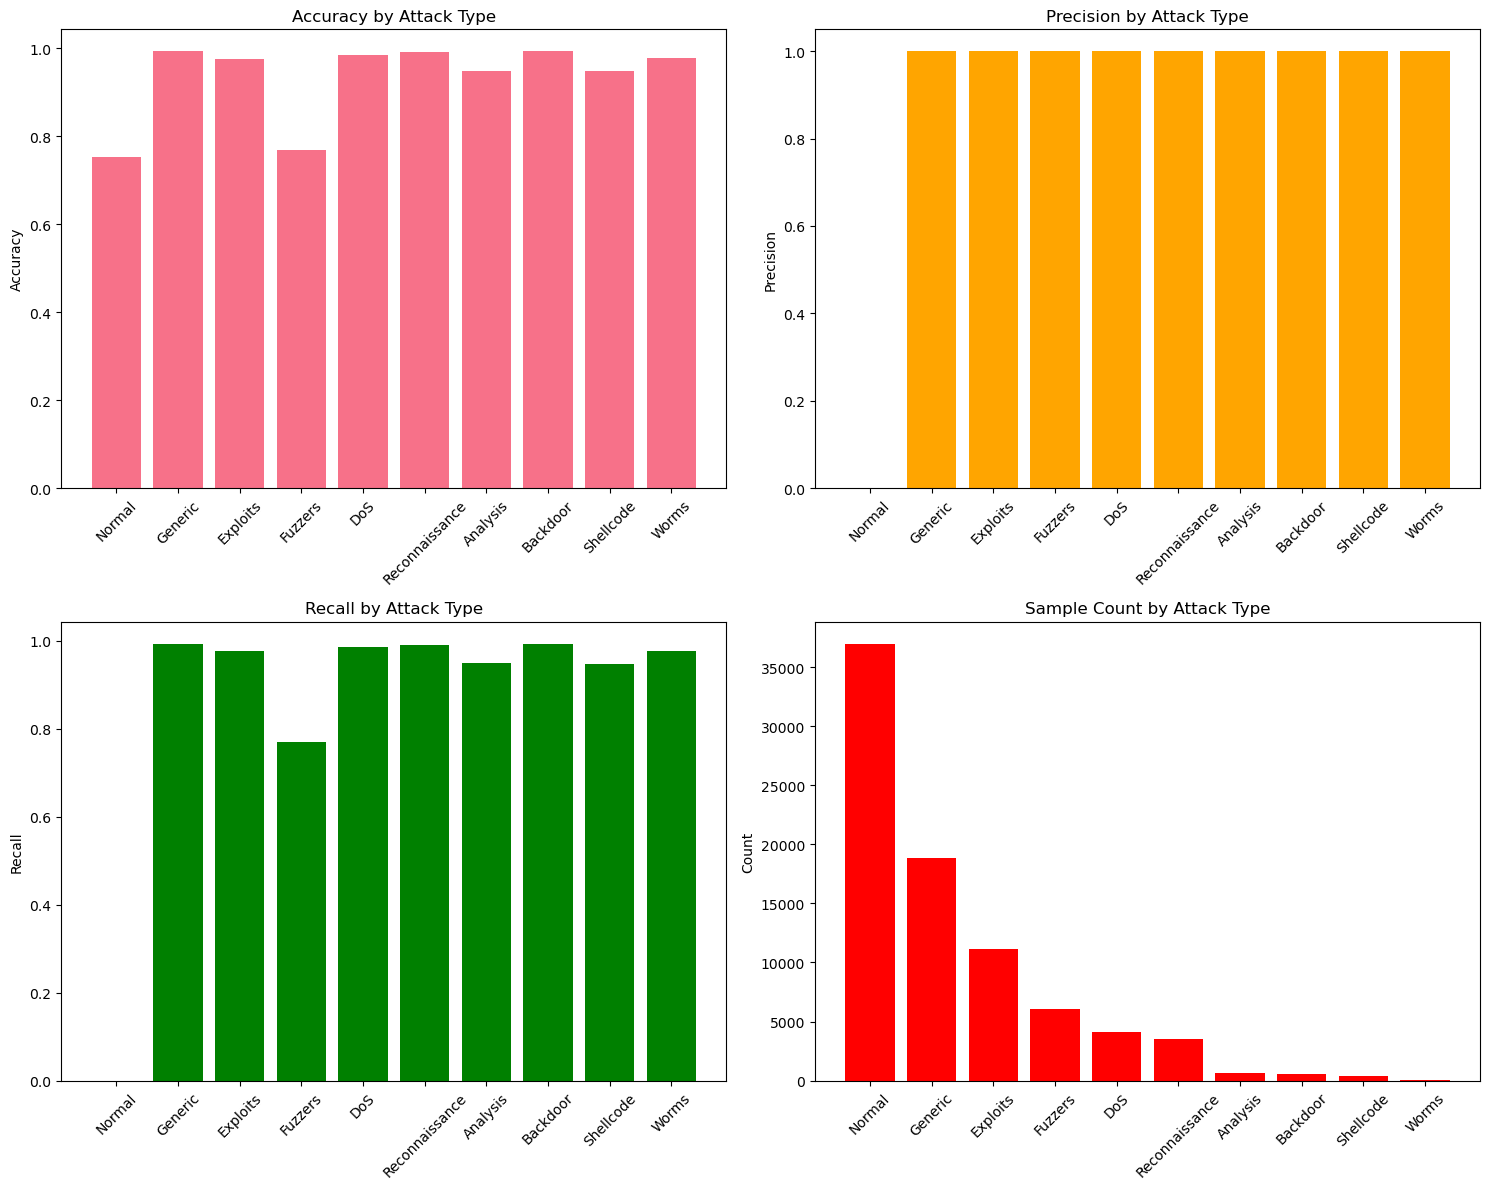

In [27]:
# Analyze performance by attack type
test_data_with_pred = testdata.copy()
test_data_with_pred['predicted'] = y_test_pred

print("=== PERFORMANCE BY ATTACK TYPE ===")
attack_performance = []

for attack_type in testdata['attack_cat'].unique():
    if pd.notna(attack_type):
        mask = testdata['attack_cat'] == attack_type
        y_true_attack = y_test[mask]
        y_pred_attack = y_test_pred[mask]
        
        if len(y_true_attack) > 0:
            accuracy = accuracy_score(y_true_attack, y_pred_attack)
            precision = precision_score(y_true_attack, y_pred_attack, zero_division=0)
            recall = recall_score(y_true_attack, y_pred_attack, zero_division=0)
            
            attack_performance.append({
                'attack_type': attack_type,
                'count': len(y_true_attack),
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall
            })

# Convert to DataFrame for better visualization
attack_perf_df = pd.DataFrame(attack_performance)
attack_perf_df = attack_perf_df.sort_values('count', ascending=False)

print(attack_perf_df)

# Visualize performance by attack type
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Accuracy by attack type
axes[0, 0].bar(attack_perf_df['attack_type'], attack_perf_df['accuracy'])
axes[0, 0].set_title('Accuracy by Attack Type')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# Precision by attack type
axes[0, 1].bar(attack_perf_df['attack_type'], attack_perf_df['precision'], color='orange')
axes[0, 1].set_title('Precision by Attack Type')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].tick_params(axis='x', rotation=45)

# Recall by attack type
axes[1, 0].bar(attack_perf_df['attack_type'], attack_perf_df['recall'], color='green')
axes[1, 0].set_title('Recall by Attack Type')
axes[1, 0].set_ylabel('Recall')
axes[1, 0].tick_params(axis='x', rotation=45)

# Count by attack type
axes[1, 1].bar(attack_perf_df['attack_type'], attack_perf_df['count'], color='red')
axes[1, 1].set_title('Sample Count by Attack Type')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 4.2 Feature Ablation Study

- removes the important features by one by one 
- retrain the model without each feature 
- Measures performance impact after removing critical features and visualize it 

FEATURE ABLATION STUDY 
Removing feature: sttl
Removing feature: ct_srv_dst
Removing feature: sbytes
Removing feature: smean
Removing feature: ct_srv_src
  removed_feature  accuracy  accuracy_drop
0            sttl  0.863480       0.001324
1      ct_srv_dst  0.868192      -0.003389
2          sbytes  0.865301      -0.000498
3           smean  0.864961      -0.000158
4      ct_srv_src  0.865666      -0.000862


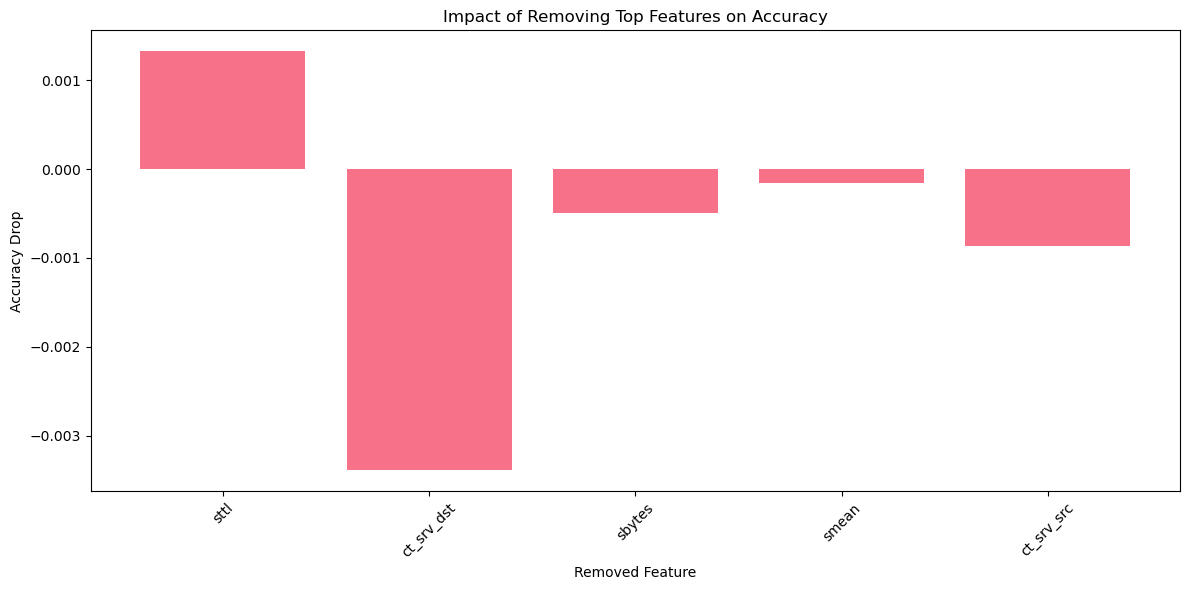

In [30]:
# Feature ablation study - analyze impact of removing top features
print("FEATURE ABLATION STUDY ")
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)
top_5_features = feature_importance.head(5)['feature'].tolist()
ablation_results = []

for i, feature_to_remove in enumerate(top_5_features):
    print(f"Removing feature: {feature_to_remove}")
    
    # Create dataset without this feature
    X_train_ablated = X_train.drop(columns=[feature_to_remove])
    X_test_ablated = X_test.drop(columns=[feature_to_remove])
    
    # Train new model
    dt_ablated = DecisionTreeClassifier(random_state=42, criterion='gini')
    dt_ablated.fit(X_train_ablated, y_train)
    
    # Evaluate
    y_pred_ablated = dt_ablated.predict(X_test_ablated)
    accuracy_ablated = accuracy_score(y_test, y_pred_ablated)
    
    ablation_results.append({
        'removed_feature': feature_to_remove,
        'accuracy': accuracy_ablated,
        'accuracy_drop': test_metrics[0] - accuracy_ablated
    })

ablation_df = pd.DataFrame(ablation_results)
print(ablation_df)

# Visualize feature importance impact
plt.figure(figsize=(12, 6))
plt.bar(ablation_df['removed_feature'], ablation_df['accuracy_drop'])
plt.title('Impact of Removing Top Features on Accuracy')
plt.xlabel('Removed Feature')
plt.ylabel('Accuracy Drop')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Conclusions

In this assignment, I explored the major concepts and techniques in data science such as data preprocessing, anomaly detection, and data visualization. I started with the cleaning and preparation of the data set by dealing with missing values and encoding categorical variables.The implementation of scikit-learn's DecisisonTreeclassifier provides deep understanding of supervised learning workflows, from data preparation through the model training and i learned to interpret confusion matrices.Data visualization was performed with numerous types of plotting techniques in the form of and bar plots that showed the distribution and relationships. Thus, this assignment laid a good foundation for working with datasets and using Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn to manipulate and visualize data and carry out some machine learning.
working with network intrusion detection data enhanced my understanding of cybersecurity challenges and the role of machine learning in threat detection.

## 6. References

[1]The official cheat sheet https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf (https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

[2]Python for Data Analysis, 3E. Wes McKinney. O'Reilly, 2022. https://wesmckinney.com/book/ (https://wesmckinney.com/book/) (McKinney created Pandas).

[3] Moustafa, N., & Slay, J. (2016). The evaluation of Network Anomaly Detection Systems: Statistical analysis of the UNSW-NB15 data set and the comparison with the KDD99 data set. Information Security Journal: A Global Perspective, 25(1-3), 18-31.

[4]Python Data Science Cheat sheet: Linked at blog page https://www.datacamp.com/community/tutorials/python-data-science-cheat-sheetbasics (https://www.datacamp.com/community/tutorials/python-data-science-cheatsheet-basics)

[5]w3schools dataframe: https://www.w3schools.com/python/pandas/pandas_dataframes.asp

[6]N. Moustafa, The UNSW-NB15 Dataset, webpage, UNSW Sydney https://research.unsw.edu.au/projects/unsw-nb15-dataset 

[7]https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html 

[8]https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-categorical-features 

[9] Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.

[10] Hastie, T., Tibshirani, R., Friedman, J. H., & Friedman, J. H. (2009). The elements of statistical learning: data mining, inference, and prediction (Vol. 2, pp. 1-758). New York: springer.


